In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# inspiration de lmfit

https://lmfit.github.io/lmfit-py/confidence.html


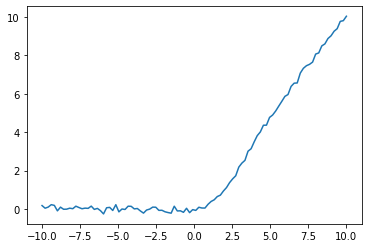

In [2]:
x = np.linspace(-10, 10, 100)
np.random.seed(0)
#y = 1/(0.1*x) + 2 
y = x * 1/(1 + 2.*np.exp(-(x-1.2)))

y += 0.1*np.random.randn(x.size)

plt.plot(x, y)

In [3]:
import lmfit
pars = lmfit.Parameters()
pars.add_many(('a', 0.1), ('b', 4))


def residual(p):
    model = x  /(1 + p['b'] * np.exp(-(x-p['a'])))

    return model - y

In [4]:
mini = lmfit.Minimizer(residual, pars)
result = mini.minimize()

In [5]:
result

In [6]:
print(lmfit.fit_report(result.params))

[[Variables]]
    a:  0.48793085 +/- 153458.619 (31450894.81%) (init = 0.1)
    b:  4.40943097 +/- 676665.158 (15345861.25%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000


In [7]:
ci = lmfit.conf_interval(mini, result)
lmfit.printfuncs.report_ci(ci)

      99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 a:      -inf      -inf      -inf   0.48793      +inf      +inf      +inf
 b:      -inf      -inf      -inf   4.40943      +inf      +inf      +inf


/usr/local/lib/python3.6/dist-packages/lmfit/confidence.py:318: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(a=0.3903446826650657) = 0.0 < max(sigmas).
  warn(errmsg)
/usr/local/lib/python3.6/dist-packages/lmfit/confidence.py:318: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(a=0.5855170239975985) = 0.0 < max(sigmas).
  warn(errmsg)
/usr/local/lib/python3.6/dist-packages/lmfit/confidence.py:318: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(b=3.5275447726482554) = 0.0 < max(sigmas).
  warn(errmsg)
/usr/local/lib/python3.6/dist-packages/lmfit/confidence.py:318: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(b=5.291317158972383) = 0.0 < max(sigmas).
  warn(errmsg)


In [8]:
result.params['a'].value

0.4879308533313321

# obtenir une variabilité

une idée: 

* introduires des Nans dans les données
* faire une boucle dans laquelle:
 * on ajoute du bruit dans les conditions initiales
 * on refait le fit
* la variabilité devrait dépendre 

In [9]:
N_test = 200
As = []

for i_test in range(N_test):
    pars = lmfit.Parameters()
    pars.add_many(('a', 0.1+0.1*np.random.randn()), ('b', 4+0.1*np.random.randn()))
    
    mini = lmfit.Minimizer(residual, pars)
    result = mini.minimize()

    As.append(result.params['a'].value)
    
print(np.mean(As), np.std(As))

0.42434142992861096 0.7164102274057743


In [10]:
As

[0.623335990968839,
 -0.5974108003817026,
 1.1811226507668948,
 1.205754746418091,
 -0.3103807857984127,
 0.7343792921636068,
 -0.4222653985644048,
 1.1983061821094723,
 1.352829235356314,
 1.0951384367853791,
 0.4810498136627196,
 -0.4667639314563266,
 -0.6101212909682362,
 0.44312904709284884,
 -0.693132831964806,
 -0.3274093083496232,
 0.9807342466626754,
 0.09142203177802298,
 1.105156122206611,
 1.0108325544702677,
 0.7797222956006777,
 0.5023639496870145,
 0.5917560676329873,
 0.9458351932540118,
 -0.554227072282789,
 1.0225058830272913,
 -0.023035442260313274,
 -0.6276839579718209,
 0.2616268220926277,
 0.8548707610678202,
 1.2243751348055723,
 -0.6863913984656171,
 -0.23083210964168324,
 0.24897242520546867,
 -0.4579290606814171,
 0.23030856977835376,
 1.3394597565399107,
 0.9406689978227892,
 0.8195473186682605,
 -0.425158537748201,
 1.2148984684253465,
 -0.02446791216084683,
 0.2956068551046201,
 -0.40091721854106094,
 0.41538187132212023,
 0.7983317555200954,
 0.447187646992

# NaN

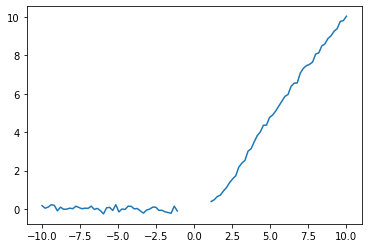

In [11]:
x = np.linspace(-10, 10, 100)
np.random.seed(0)
#y = 1/(0.1*x) + 2 
y = x * 1/(1 + 2.*np.exp(-(x-1.2)))
y += 0.1*np.random.randn(x.size)
y[45:55] = np.nan*10

plt.plot(x, y)

In [12]:
N_test = 200

for y1 in range(0, 100, 10) :
    
    y2 = y1+10
    
    y = x * 1/(1 + 2.*np.exp(-(x-1.2)))
    y += 0.1*np.random.randn(x.size)
    y[y1:y2] = np.nan*10
    
    As = []
    for i_test in range(N_test):
        pars = lmfit.Parameters()
        pars.add_many(('a', 0.1+0.1*np.random.randn()), ('b', 4+0.1*np.random.randn()))

        mini = lmfit.Minimizer(residual, pars,nan_policy='omit')
        result = mini.minimize()

        As.append(result.params['a'].value)

    print('y[', y1, ',', y2, '] =', np.mean(As), '+/-', np.std(As))

y[ 0 , 10 ] = 0.39547935485236446 +/- 0.7039189936171978
y[ 10 , 20 ] = 0.475189036702711 +/- 0.695813980148438
y[ 20 , 30 ] = 0.3591404250973666 +/- 0.6005529843561578
y[ 30 , 40 ] = 0.5455471614322996 +/- 0.697633922127737
y[ 40 , 50 ] = 0.4970594195792929 +/- 0.6974985319536927
y[ 50 , 60 ] = 0.36171498867066065 +/- 0.727240273563647
y[ 60 , 70 ] = 0.4460794601805247 +/- 0.727261135322074
y[ 70 , 80 ] = 0.44268810515230833 +/- 0.7266288316285862
y[ 80 , 90 ] = 0.37026098366631616 +/- 0.6802014261211431
y[ 90 , 100 ] = 0.48542540400834333 +/- 0.7084716321445381
